In [ ]:
# "MOUNTING" Google Drive to point to files
# downloaded from https://wwwmpa.mpa-garching.mpg.de/SDSS/DR7/
# into this directory

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import scipy as sp
import sympy as smp
from astropy.io import fits
import matplotlib.pyplot as plt

In [ ]:
# Open the FITS file
with fits.open("/content/drive/My Drive/Galaxy/gal_fiboh_dr7_v5_2.fits") as hdul: dataOH = hdul[1].data
with fits.open("/content/drive/My Drive/Galaxy/gal_totsfr_dr7_v5_2.fits") as hdul: dataSFR = hdul[1].data
with fits.open("/content/drive/My Drive/Galaxy/totlgm_dr7_v5_2.fit") as hdul: dataLGM = hdul[1].data

In [ ]:
OH = dataOH['AVG']
SFR = dataSFR['AVG']
LGM = dataLGM['AVG']

In [ ]:
# Checked what samples to exclude
pretty = (OH>0)*(SFR>-80)*(LGM>2)

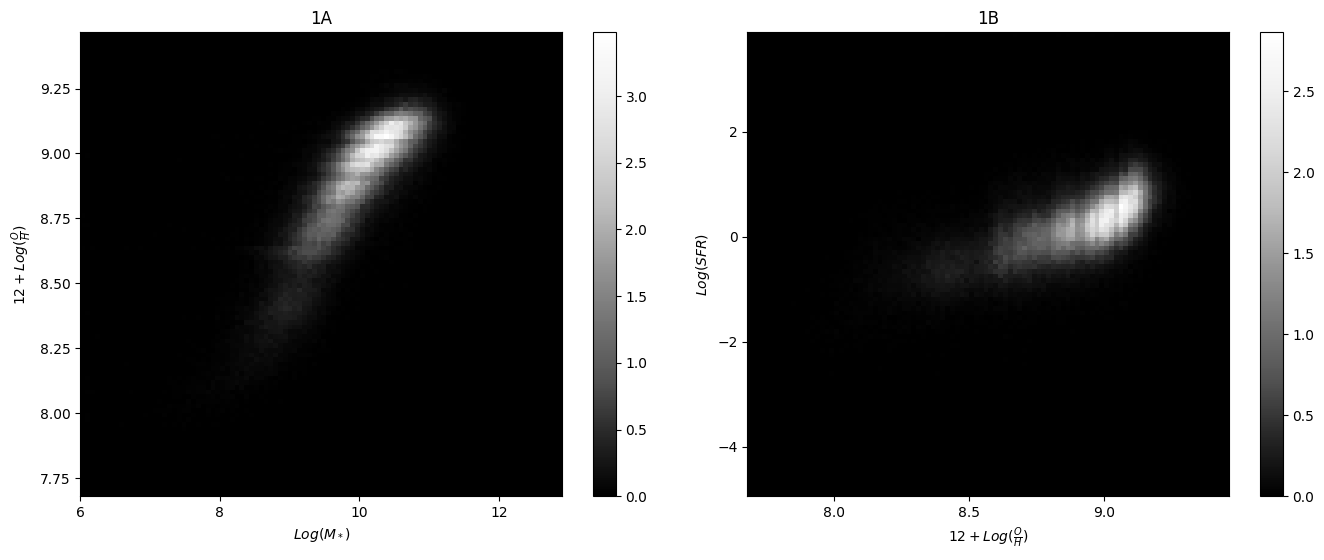

In [ ]:
# Problem 1A, 1B

fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(14,6))

# Gas-phase metallicity and Stellar mass
ax0 = axs[0].hist2d(LGM[pretty],OH[pretty],bins=(100,100),cmap=plt.cm.Greys_r,density=True)
axs[0].set_xlabel(r"$Log(M_*)$")
axs[0].set_ylabel(r"$12+Log(\frac{O}{H})$")
axs[0].set_title("1A")
fig.colorbar(ax0[3], ax=axs[0])

# Gas-Phase Metallicity and Star Formation Rate
ax1 = axs[1].hist2d(OH[pretty],SFR[pretty],bins=(100,100),cmap=plt.cm.Greys_r,density=True)
axs[1].set_xlabel(r"$12+Log(\frac{O}{H})$")
axs[1].set_ylabel(r"$Log(SFR)$")
axs[1].set_title("1B")
fig.colorbar(ax1[3], ax=axs[1])

plt.rcParams.update({'font.size': 20})
plt.tight_layout()
plt.show()

1A) A galaxy with a higher stellar mass would have a higher star formation rate (formed more stars in a given time) whose deaths in the form of supernovae would have released metals like the oxygen plotted here.

1B) In the log-space of this plot, there is a faint (low-slope) but present correspondence between the SFR and gas-phase-metallicity. More metal rich galaxies have a higher SFR (and therefore a more extensive star formation history).

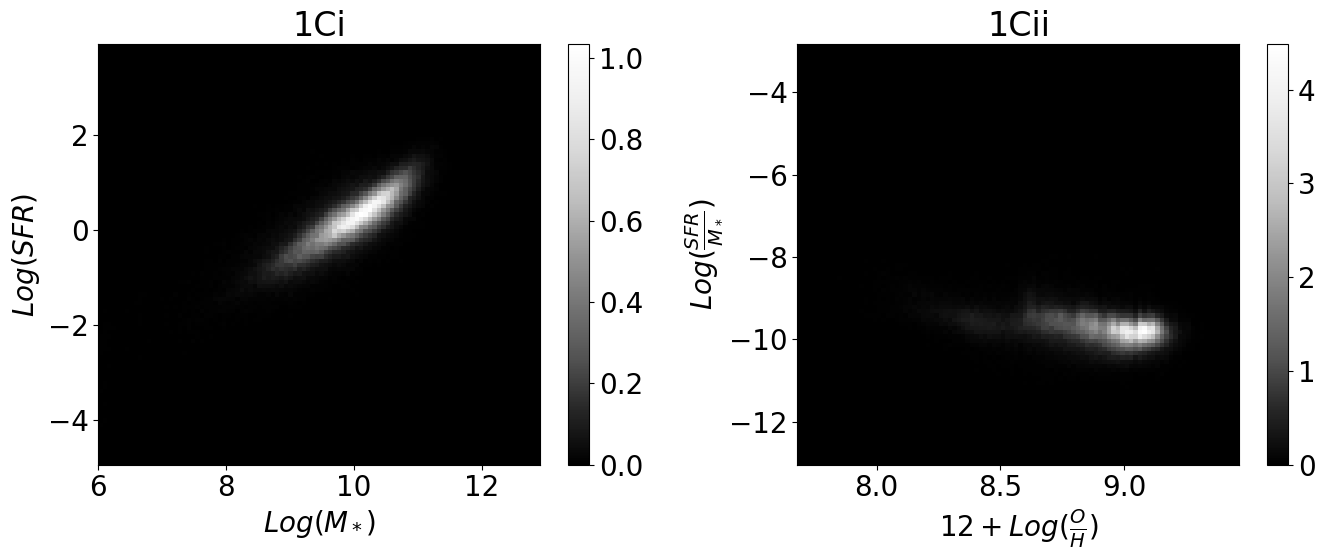

In [ ]:
# Problem 1C

fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(14,6))

# Stellar Mass and Star Formation Rate
ax2 = axs[0].hist2d(LGM[pretty],SFR[pretty],bins=(100,100),cmap=plt.cm.Greys_r,density=True)
axs[0].set_xlabel(r"$Log(M_*)$")
axs[0].set_ylabel(r"$Log(SFR)$")
axs[0].set_title("1Ci")
fig.colorbar(ax2[3], ax=axs[0])

# Stellar Mass and Star Formation Rate
ax2 = axs[1].hist2d(OH[pretty],np.log10( (10**SFR[pretty]) / (10**LGM[pretty]) ),bins=(100,100),cmap=plt.cm.Greys_r,density=True)
axs[1].set_xlabel(r"$12+Log(\frac{O}{H})$")
axs[1].set_ylabel(r"$Log(\frac{SFR}{M_*})$")
axs[1].set_title("1Cii")
fig.colorbar(ax2[3], ax=axs[1])

plt.rcParams.update({'font.size': 20})
plt.tight_layout()
plt.show()

1Ci) Just confirming that there's a strong correspondence between SFR and stellar mass as you'd expect.

1Cii) By dividing SFR by stellar mass we now have a specific SFR. Plotted vs the metallicity, we see that in log space there's essentially no correlation between the two. Suggests that the SFR-metallicity relation just reflects the SFR-mass relation. I am ignoring the slight correlation on the far right of the  plot though...

1D) If metallicity is correlated with SFR, one possible explanation is:
A more metal rich environment will allow for cooling through these metals' (like Oxygen's) electron de-excitation. This loss of energy due to emission promotes the collapse of the environment, resulting in star formation.

In [ ]:
# Problem 2

I, C, R, R0, n, bn = smp.symbols('I C R R0 n bn', real=True)
Intensity = smp.Eq( I, C*smp.exp(-bn*((R/R0)**(1/n))))
smp.pprint(Intensity)

Normalize = 2*smp.pi*R*Intensity.rhs
smp.pprint(Normalize)
Normalized = smp.integrate(Normalize,(R,0,smp.oo))
# smp.pprint(Normalized) # Well this kinda blows up
#Constant = smp.solve(smp.Eq(1,Normalized), C) # This doesn't work :(
# Lets try the other integral

               ____
              ╱ R  
       -bn⋅n ╱  ── 
           ╲╱   R₀ 
I = C⋅ℯ            
                 ____
                ╱ R  
         -bn⋅n ╱  ── 
             ╲╱   R₀ 
2⋅π⋅C⋅R⋅ℯ            


In [ ]:
# Test: Can we isolate the constant C?
Normalized = smp.integrate(Normalize,(R,0,1))
smp.pprint(Normalized)
Const = smp.solve(smp.Eq(1/2,Normalized), C) # Huge expression, but yes we can.
# NOTE: This integral makes the R = (R/Reff).... but Reff isn't equal to R0?

                            ⎛       -1    ⎞                               ⎛             -1    ⎞
                            ⎜       ───   ⎟                               ⎜             ───   ⎟
        2   -2⋅n  2         ⎜        n    ⎟           2   -2⋅n  2         ⎜     n ___    n    ⎟
4⋅π⋅C⋅R₀ ⋅bn    ⋅n ⋅Γ(2⋅n)⋅γ⎝2⋅n, R₀   ⋅bn⎠   4⋅π⋅C⋅R₀ ⋅bn    ⋅n ⋅Γ(2⋅n)⋅γ⎝2⋅n, ╲╱ 0 ⋅R₀   ⋅bn⎠
─────────────────────────────────────────── - ─────────────────────────────────────────────────
                Γ(2⋅n + 1)                                       Γ(2⋅n + 1)                    


In [ ]:
# Can we can obtain the constant C?
# wiki says bn ~ 2n - 1/3 + 4/405n + 46/25515n^2 + 131/1148175n^3 - 2194697/30690717750n^4 for n>0.36
N=0.5
Bn = 2*N - 1/3 + 4/(405*N) + 46/(25515*N**2) + 131/(1148175*N**3) - 2194697/(30690717750*N**4)
Const = smp.solve(smp.Eq(1/2,Normalized.subs( {bn:Bn, n:0.5, R0:1} )), C) # ASSUMED: R0=Reff
Const # Cool, this is n=0.5's const

[0.220660274231734]

In [ ]:
# Get each n's C value :)

nn = np.array([0.5,1,2,4,8])
Bn = 2*nn - 1/3 + 4/(405*nn) + 46/(25515*nn**2) + 131/(1148175*nn**3) - 2194697/(30690717750*nn**4)
Consts = []
for BnBn,nnn in zip(Bn,nn):
  Consts.append(smp.solve(smp.Eq(1/2,Normalized.subs( {bn:BnBn, n:nnn, R0:1} )), C)[0])
print("Constants C: {}".format(Consts))

Constants C: [0.220660274231734, 0.448325935632177, 2.41145788245597, 94.4827855901647, 200639.444077430]


    n ___   
   -╲╱ R ⋅bn
C⋅ℯ         


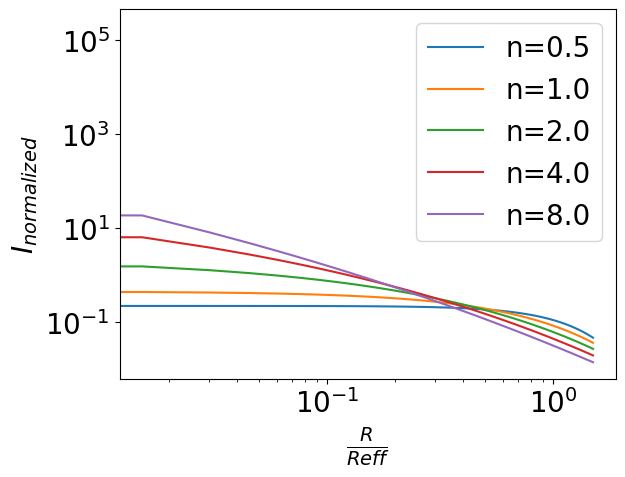

In [ ]:
# Compute the intensities for different n's and plot!

intensity = Intensity.rhs.subs(R0,1) # ASSUMED: R0=Reff
smp.pprint(intensity)

# "Lambdify the expression"
func = smp.utilities.lambdify((C,bn,R,n), intensity, modules=['numpy'])

Len = 100
rr = np.linspace(0,1.5,Len)

for CC,BnBn,nnn in zip(Consts,Bn,nn):
  result = func(CC,BnBn,rr,nnn)
  plt.plot(rr,result,label="n={}".format(nnn))

plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r"$\frac{R}{Reff}$")
plt.ylabel(r"$I_{normalized}$")
plt.rcParams.update({'font.size': 20})
plt.show()

2) For increasing n, the initial brightness of a galaxy is higher but its brightness is more sensitive to distance from the center, decreasing a more rapid rate than for lower sersic indexes.

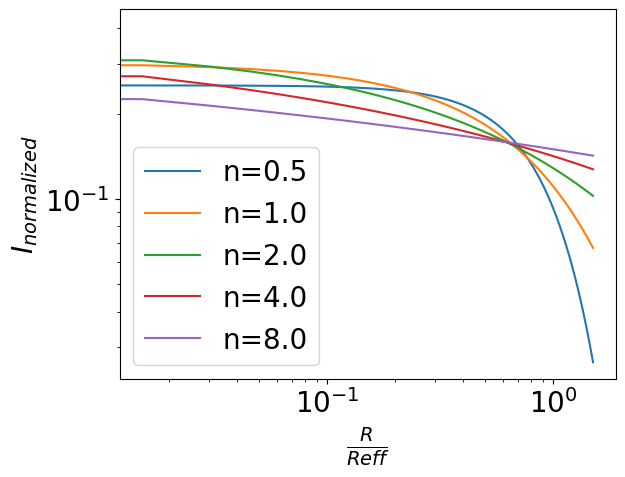

In [ ]:
# The above result was made with the approximate b_n term. Without it I get the
# profiles below. I didn't see a means to implement the suggested gamma logic
# though their form were quite similar to that of the normalization integral...
from PIL import Image
from IPython.display import display
img = Image.open('/content/drive/My Drive/Galaxy/DrummondPset1Q2badPlot.png')
display(img)

In [ ]:
# Problem 3

# Links to some great plots
#https://www.aanda.org/articles/aa/full_html/2023/09/aa45581-22/F19.html
#https://www.aanda.org/articles/aa/full_html/2023/09/aa45581-22/F24.html # Used the "Total" curves :)

In [ ]:
# Problem 4

# Planck 2018 results
# https://www.aanda.org/articles/aa/full_html/2020/09/aa33910-18/aa33910-18.html (r1)

# Sean Carroll article
# chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://articles.adsabs.harvard.edu/pdf/1992ARA&A..30..499C (r2)

# David W. Hogg
# chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://arxiv.org/pdf/astro-ph/9905116 (r3)

# Some ingredients
OmegaM = 0.315 # (r1)
OmegaK = 0 # (r1) kinda
OmegaL = 0.685 # (r1)
H0 = 67.4 # (r1)
H0_s = 2.18E-18 # (1/s)
H0_Gyr = 0.0689 # (1/Gyr)

c = 3E10 # cm/s
D_H = c/H0_s # cm
D_H_Mpc = D_H*(3.24078E-25) # Mpc
t_H = 1/H0_s # s
t_H_Gyr = 1/H0_Gyr # Gyr

Len=100
Z_array = np.linspace(1E-3,10**1.5,Len)

# E equation shows up every where so we'll start with that
E, omegaM, omegaK, omegaL, z = smp.symbols('E omegaM omegaK omegaL z', real=True, positive=True)
E_func = smp.Eq( E, smp.sqrt((omegaM*((1+z)**3)) + (omegaK*((1+z)**2)) + omegaL) ).subs( {omegaM:OmegaM, omegaK:OmegaK, omegaL:OmegaL} )
smp.pprint(E_func)

#from __future__ import division

                         _______________________________
                        ╱                         3     
E = 0.827647267862342⋅╲╱  0.45985401459854⋅(z + 1)  + 1 


In [ ]:
# a) Luminosity Distance (Mpc)

D_C_array = []
for Z in Z_array:
  integral = smp.integrate( E_func.rhs**-1, (z,1E-3,Z) )
  D_C = D_H_Mpc * integral
  D_C_array.append(D_C)

In [ ]:
# ISSUE: The integral for D_C is spitting out some complex numbers...
#        This is messing with the results.....
D_C_array

[0,
 -1797.96754533963*gamma(1/3)*hyper((1/3, 1/2), (4/3,), -0.461234956664233)/gamma(4/3) + 2371.68602943944*gamma(1/3)*hyper((1/3, 1/2), (4/3,), 1.05863989500957*exp_polar(I*pi))/gamma(4/3),
 -1797.96754533963*gamma(1/3)*hyper((1/3, 1/2), (4/3,), -0.461234956664233)/gamma(4/3) + 2945.40451353925*gamma(1/3)*hyper((1/3, 1/2), (4/3,), 2.02773647969383*exp_polar(I*pi))/gamma(4/3),
 -1797.96754533963*gamma(1/3)*hyper((1/3, 1/2), (4/3,), -0.461234956664233)/gamma(4/3) + 3519.12299763907*gamma(1/3)*hyper((1/3, 1/2), (4/3,), 3.45843811630407*exp_polar(I*pi))/gamma(4/3),
 -1797.96754533963*gamma(1/3)*hyper((1/3, 1/2), (4/3,), -0.461234956664233)/gamma(4/3) + 4092.84148173888*gamma(1/3)*hyper((1/3, 1/2), (4/3,), 5.44065821042734*exp_polar(I*pi))/gamma(4/3),
 -1797.96754533963*gamma(1/3)*hyper((1/3, 1/2), (4/3,), -0.461234956664233)/gamma(4/3) + 4666.5599658387*gamma(1/3)*hyper((1/3, 1/2), (4/3,), 8.06431016765068*exp_polar(I*pi))/gamma(4/3),
 -1797.96754533963*gamma(1/3)*hyper((1/3, 1/2), (4/3

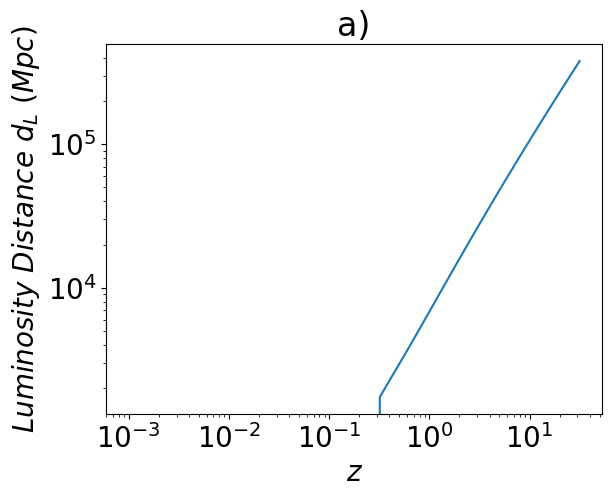

In [ ]:
D_M = D_C_array
D_L = (1+Z_array)*D_M

plt.plot(Z_array, D_L)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r"$z$")
plt.ylabel(r"$Luminosity \ Distance \ d_L \ (Mpc)$")
plt.title("a)")
plt.rcParams.update({'font.size': 15})
plt.show()

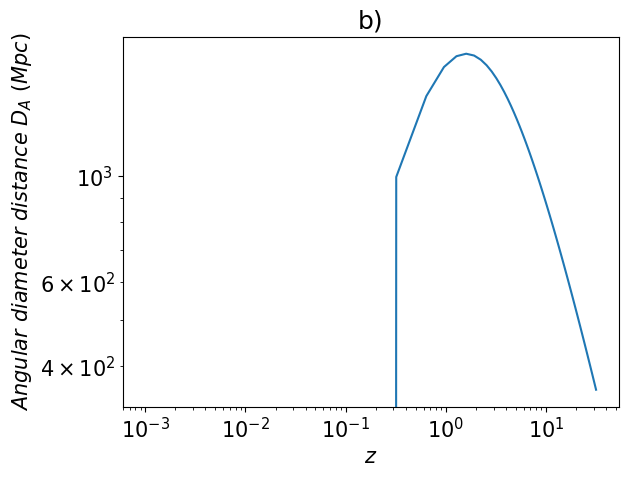

In [ ]:
# b) Angular diameter distance (Mpc)

D_A = D_M / (1+Z_array)

plt.plot(Z_array,D_A)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r"$z$")
plt.ylabel(r"$Angular \ diameter \ distance \ D_A \ (Mpc)$")
plt.title("b)")
plt.rcParams.update({'font.size': 15})
plt.show()

In [ ]:
# c) Apparent Magnitude

C = 0
L_milkyWay = 5E36 # Watts # Placeholder while I find the L at M=10^12.5
D_L_pc = D_L*1E6
m = -2.5*np.log10(L_milkyWay/(4*np.pi*(D_L**2))) + C

plt.plot(Z_array,m)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r"$z$")
plt.ylabel(r"$Apparent \ magnitude \ m$")
plt.title("c)")
plt.rcParams.update({'font.size': 15})
plt.show()

TypeError: loop of ufunc does not support argument 0 of type ComplexInfinity which has no callable log10 method

TypeError: Cannot convert complex to float

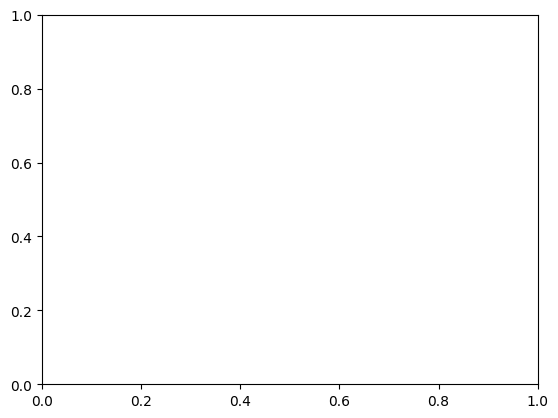

In [ ]:
# d) Angle subtended by 1kpc (as)

size = 1 # kpc
D_A_pc = D_A*1E3 # kpc
theta = size / D_A # radians
theta += 206265 # arc seconds

plt.plot(Z_array,theta)
plt.xscale('log')
plt.xlabel(r"$z$")
plt.ylabel(r"$Angle \ subtended \ by \ 1 \ kpc \ (as)$")
plt.title("d)")
plt.rcParams.update({'font.size': 15})
plt.show()

In [ ]:
# e) Lookback time (Gyrs)

t_L_array = []
for Z in Z_array:
  t_L = t_H_Gyr * smp.integrate( ((1+z)*E_func.rhs)**-1, (z,1E-3,Z) )
  t_L_array.append(t_L)

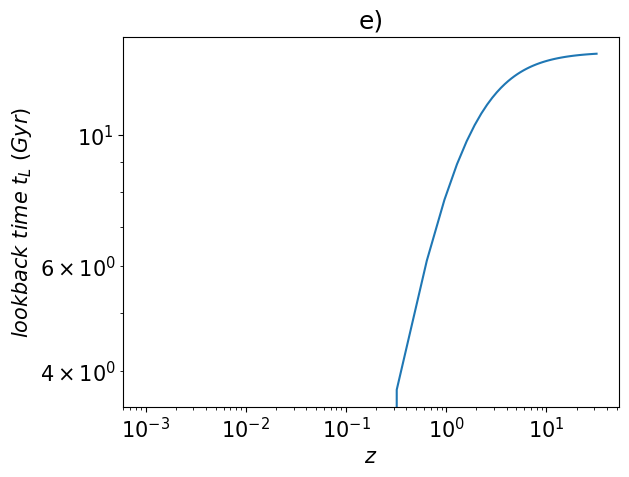

In [ ]:
plt.plot(Z_array,t_L_array)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r"$z$")
plt.ylabel(r"$lookback \ time \ t_L \ (Gyr)$")
plt.title("e)")
plt.rcParams.update({'font.size': 15})
plt.show()

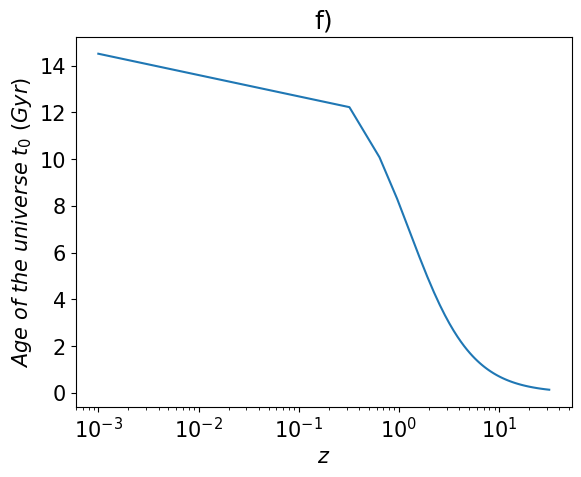

In [ ]:
# f) Age of the universe (Gyrs)


H_Z = H0_Gyr * E_func.rhs # Wei & Wu 2017
t_universe = 1/H_Z

# "Lambdify the expression"
func = smp.utilities.lambdify((z), t_universe, modules=['numpy'])
result = func(Z_array)

plt.plot(Z_array,result)
plt.xscale('log')
plt.xlabel(r"$z$")
plt.ylabel(r"$Age \ of \ the \ universe \ t_0 \ (Gyr)$")
plt.title("f)")
plt.rcParams.update({'font.size': 15})
plt.show()

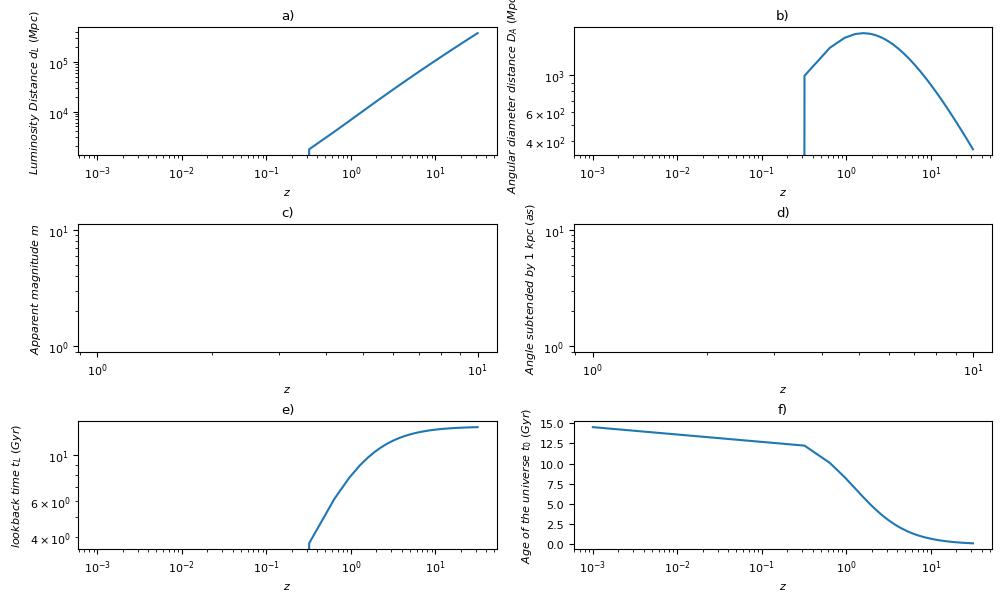

In [ ]:
# Plot everything we've got?

fig, axs = plt.subplots(nrows=3,ncols=2,figsize=(10,6))

axs[0,0].plot(Z_array, D_L)
axs[0,0].set_xscale('log')
axs[0,0].set_yscale('log')
axs[0,0].set_xlabel(r"$z$")
axs[0,0].set_ylabel(r"$Luminosity \ Distance \ d_L \ (Mpc)$")
axs[0,0].set_title("a)")

axs[0,1].plot(Z_array,D_A)
axs[0,1].set_xscale('log')
axs[0,1].set_yscale('log')
axs[0,1].set_xlabel(r"$z$")
axs[0,1].set_ylabel(r"$Angular \ diameter \ distance \ D_A \ (Mpc)$")
axs[0,1].set_title("b)")

#axs[1,0].plot(Z_array, m)
axs[1,0].set_xscale('log')
axs[1,0].set_yscale('log')
axs[1,0].set_xlabel(r"$z$")
axs[1,0].set_ylabel(r"$Apparent \ magnitude \ m$")
axs[1,0].set_title("c)")

#axs[1,1].plot(Z_array, theta)
axs[1,1].set_xscale('log')
axs[1,1].set_yscale('log')
axs[1,1].set_xlabel(r"$z$")
axs[1,1].set_ylabel(r"$Angle \ subtended \ by \ 1 \ kpc \ (as)$")
axs[1,1].set_title("d)")

axs[2,0].plot(Z_array, t_L_array)
axs[2,0].set_xscale('log')
axs[2,0].set_yscale('log')
axs[2,0].set_xlabel(r"$z$")
axs[2,0].set_ylabel(r"$lookback \ time \ t_L \ (Gyr)$")
axs[2,0].set_title("e)")

axs[2,1].plot(Z_array, result)
axs[2,1].set_xscale('log')
axs[2,1].set_xlabel(r"$z$")
axs[2,1].set_ylabel(r"$Age \ of \ the \ universe \ t_0 \ (Gyr)$")
axs[2,1].set_title("f)")

plt.rcParams.update({'font.size': 6})
plt.tight_layout()
plt.show()